In [1021]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import os
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
from scipy.stats import linregress
import matplotlib.pyplot as plt 
from numpy import sin, cos, exp, log, cosh
from ipywidgets import interact
import ipywidgets as widgets

wl=2
MYSTYLE=[dict(color='royalblue', width=wl), dict(color='red', width=wl, dash='dot'),
         dict(color='aqua', width=wl, dash='dash'), dict(color='violet', width=wl, dash='dash'),
         dict(color='lightskyblue', width=wl, dash='dot'), dict(color='orange', width=wl, dash='dot'),
         dict(color='black', width=wl, dash='dash'), dict(color='darkmagenta', width=wl, dash='dash')]
def plot_graph(list_x, list_y, names, xtitle, ytitle, image_name, list_x_fill=[], list_y_fill=[], mode=[], \
               dash=['solid', 'dot', 'dash', 'longdash'], \
               colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
               marker_size=15, linesize=2, xrange =[], yrange = [], \
               marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
               width=1000, height=500, path='./', yanchor='center', y0_anchor=0.01, xanchor='left', x0_anchor=0.3, xlog=False, ylog=False, \
               fill=True, list_xx_fill=[], list_yy_fill=[], fill_mode=[], fill_color=['royalblue', 'aqua', 'lightskyblue']*5):
    if mode == []:
        for i in range(len(list_x)):
            mode.append('lines+markers')


    while len(marker_style) < len(list_x):
        marker_style[:] = marker_style[:] + marker_style[:]
    figborderlinesize = 0.7
    legborderlinesize = 0.7
    yaxis = dict(
        tickfont = dict(
            family = 'Times New Roman',
            size = 20,
            color = 'black'
        ),
        titlefont = dict(
            family = 'Times New Roman',
            size = 25,
            color = 'black'
        ),
    )
    xaxis = dict(
        tickfont = dict(
            family = 'Times New Roman',
            size = 20,
            color = 'black'
        ),
        titlefont = dict(
            family = 'Times New Roman',
            size = 25,
            color = 'black'
        )
    )

    axis_style = dict(showline=True, gridwidth=1, gridcolor='lightgrey', linewidth=figborderlinesize, linecolor='black', mirror=True, ticks='outside', tickfont = dict(family = 'Times New Roman', size = 20, color = 'black'))
    bg_style = {'plot_bgcolor': 'rgba(255, 255, 255, 1)', 'paper_bgcolor': 'rgba(255, 255, 255, 1)',}


    fig = go.Figure()
    k = len(list_x)
    n_fill = len(list_x_fill)
    if len(list_x_fill) == 2 and len(list_y_fill) == 2:
        fig.add_trace(go.Scatter(x=list_x_fill[1], y=list_y_fill[1], name=names[k+1], mode='lines', fillcolor='blueviolet', line_color='blueviolet', fill='tozeroy')) # fill to trace0 y
        fig.add_trace(go.Scatter(x=list_x_fill[0], y=list_y_fill[0], name=names[k], mode='lines', fillcolor='lightsteelblue',     line_color='indigo', fill='tozeroy')) # fill down to xaxis
    for i,x in enumerate(list_x):
        print('Plot curve number:', i)
        y = np.asarray(list_y[i])
        fig.add_trace(go.Scatter(x=x, y=y, name=names[i],
                                 mode=mode[i],
                                 marker=dict(
                                     size=marker_size,
                                     line=dict(width=1)
                                 ),
                                 marker_symbol=marker_style[i],
                                 line=dict(width=linesize, dash=dash[i]),
                                 textfont=dict(
                                     family="Times New Roman",
                                     size=18,
                                     color="LightSeaGreen")
                                 ))
        if colors != []:
            fig['data'][i + n_fill]['marker']['line']['color'] = colors[i]
            fig['data'][i + n_fill]['line']['color'] = colors[i]
# fill the line
    for i,x in enumerate(list_xx_fill):        
        fig.add_trace(go.Scatter(x=x, y=list_yy_fill[i], 
                     fill=fill_mode[i], 
                     name=names[len(list_x) + i], 
                     line=dict(width=0.5, color=fill_color[i]))
                     )
        
    fig.update_layout(
        width = width,
        height = height,
        xaxis_title=xtitle,
        yaxis_title=ytitle,
        yaxis = yaxis,
        xaxis = xaxis,
        showlegend=True
    )
    fig.update_layout(bg_style)
    fig.update_xaxes(axis_style)
    fig.update_yaxes(axis_style)
    fig.update_layout(legend=dict(
        bgcolor="White",
        bordercolor="Black",
        borderwidth=figborderlinesize
    ))
    fig.update_layout(font=dict(
        family="Times New Roman",
        size=20,
        color="Black"
    ))
    fig.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=50,
            b=50,
            t=0,
            pad=0.4
        ),
        #     paper_bgcolor="LightSteelBlue",
    )
    fig.update_layout(legend=dict(
        yanchor=yanchor,
        y=y0_anchor,
        xanchor=xanchor,
        x=x0_anchor
    ))
    if len(xrange) == 2:
        fig.update_xaxes(range=xrange)
    if len(yrange) == 2:
        fig.update_yaxes(range=yrange)
    if xlog:
        fig.update_xaxes(type="log")
    if ylog:
        fig.update_yaxes(type="log")
    fig.show()
    fn = os.path.join(path, image_name)
    print('Write image to file:', fn)
    fig.write_image(str(Path(fn)), engine="kaleido")
    print("Successfully generated:", fn)



def plotSpaceErrorVsGridSize(tfixs, ylabel, ytitle, data_w_tfix, data_b_tfix, Func = None):
    names = []
    for tfix in tfixs:
        print(f"tfix={tfix}")
        list_x = []
        list_yL1 = []
        list_yL2 = []
        list_yLinf = []
        names= ['$L_1$', '$L_2$', '$L_{\mathrm{inf}}$', '$\propto h$', '$\propto h^2$']
        for lev in levs:
            print(f"lev={lev}")
            try:
                df = data_b_tfix[lev][tfix]
                xx = df['x'].values
                yy = df[ylabel].values
                N = len(df['x'])
                if Func:
                    print('Use Func')
                    yexact = Func(xx, tfix)
                else:
                    print('Use data_w_tfix')
                    fexact = interp1d(data_w_tfix[tfix]['x'].values, data_w_tfix[tfix][ylabel].values)
                    yexact = fexact(xx)

                list_yLinf.append( np.abs(yy - yexact).max() )
                list_yL2.append( np.sqrt( np.sum( ( yy - yexact )**2 / N ) ) )
                list_yL1.append( np.sum( np.abs( yy - yexact ) ) / N )
                list_x.append( L0/2**lev )
                names.append(r'$J_{\max}=' + str(lev) + '$' )
            except:
                print(f'No basilisk data for level={lev}')    
        slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_yL1))
        print('Slope L1:', slope)
        slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_yL2))
        print('Slope L2:', slope)
        slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_yLinf))
        print('Slope Linf:', slope)
        line_x = np.linspace(list_x[0], list_x[-1], 1001)
        def line(x, slope):
            return pp*(list_yL1[0] + list_yL1[-1])*2**(slope-1)/(list_x[0] + list_x[-1])**slope * x**slope
        plot_x = [list_x, list_x, list_x, line_x, line_x]
        plot_y = [list_yL1, list_yL2, list_yLinf, line(line_x, 1), line(line_x, 2)]
        plot_graph(plot_x, plot_y, names, 
                   xtitle=r'$\Large h$', ytitle=ytitle, 
                   image_name=f'Couette_Err_{ylabel}_vs_h_t={tfix}.pdf', list_x_fill=[], list_y_fill=[], 
                   mode=['markers+lines', 'markers+lines', 'markers+lines', 'lines', 'lines', 'lines'], \
                   dash=['solid', 'solid', 'solid', 'dot', 'dash'], \
                   colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
                   marker_size=10, xrange =[], yrange = [], \
                   marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
                   width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)
        plot_x = [list_x, line_x, line_x]
        plot_y = [list_yL2, line(line_x, 1), line(line_x, 2)]
        names= ['$L_2$', '$\propto h$', '$\propto h^2$']
        plot_graph(plot_x, plot_y, names, 
                   xtitle=r'$\Large h$', ytitle=ytitle, 
                   image_name=f'Couette_Err_{ylabel}_vs_h_L2_t={tfix}.pdf', list_x_fill=[], list_y_fill=[], 
                   mode=['markers+lines', 'lines', 'lines', 'lines', 'lines', 'lines'], \
                   dash=['solid', 'dot', 'dash'], \
                   colors=['blue', 'green', 'black' ], \
                   marker_size=10, xrange =[], yrange = [], \
                   marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
                   width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)

        

    
def lteInteract(hArray=(0.0001, 0.1, 0.001), etaArray=(0.000001, 0.01, 0.001), xlog=False, ylog=False, L=1):
    fig = go.FigureWidget()
    fig.add_scatter()
    if xlog:
        fig.update_xaxes(type="log")
    if ylog:
        fig.update_yaxes(type="log")

    xs=np.linspace(0, 6, 100)

    @interact(h=hArray, eta=etaArray)
    def update(h=0.01, eta=0.0001):
        ys = np.linspace(h, L - h, int(L/h - 1))
        with fig.batch_update():
            for i,scatt in enumerate(fig.data):
                scatt.x=ys
                scatt.y=-lte(ys, eta, h)
        print('h =', h, ', eta =', eta)
    return fig

def EInteract(hArray=(0.0001, 0.1, 0.001), etaArray=(0.000001, 0.01, 0.001), xlog=False, ylog=False, L=1):
    fig = go.FigureWidget()
    fig.add_scatter()
    if xlog:
        fig.update_xaxes(type="log")
    if ylog:
        fig.update_yaxes(type="log")

    xs=np.linspace(0, 6, 100)

    @interact(h=hArray, eta=etaArray)
    def update(h=0.01, eta=0.0001):
        ys = np.linspace(h, L - h, int(L/h - 1))
        with fig.batch_update():
            for i,scatt in enumerate(fig.data):
                res = calcE(eta, h, L)
                scatt.x = res[0]
                scatt.y = res[1]
        print('h =', h, ', eta =', eta, ', L =', L)
    return fig



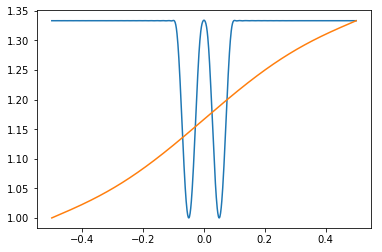

In [600]:
IC = 'smooth'
if IC == 'smooth':
    Ts = 4./3.;
    T0 = 1;
else:
    Ts = 0.95;
    T0 = 1;
delta = 0.05;
pi = np.pi
chi_dif = 0.00885347
A = 0

L0 = 2

def Texact(x,t): #2 humps
    res = Ts + 2*((T0 - Ts)/delta**6)* \
    sum([192 * cos(delta*n*pi) * sin((n*pi)/2) * \
         (delta*n*pi*(-15 + delta**2*n**2*pi**2)*cos(delta*n*pi) + \
         3*(5 - 2*delta**2*n**2*pi**2)*sin(delta*n*pi))/(n**7*pi**7)*sin(pi*n*(x + 0.5)) * \
         exp(-chi_dif*(pi*n)**2*t) for n in range(1, 100) ])
    return res

def uexact(x,t):
    res = 0.5 + x - t + t
    return res

def TexactSmooth(x,t):
    res = T0 + (Ts - T0)*(x + 0.5) + \
    (Ts - T0)*sum([(((-1)**n + 1)/(pi*n*(1 - n**2)))*sin(pi*n*(x + 0.5)) * \
         exp(-chi_dif*(pi*n)**2*t) for n in range(2, 100) ])
    return res

xx = np.linspace(-0.5, 0.5, 1000)
plt.plot(xx, Texact(xx,0))
plt.plot(xx, TexactSmooth(xx,2))
plt.show()

if IC == 'smooth':
    Texact = TexactSmooth

# Verification Couette flow

In [547]:
TexactSmooth(1,1)

0.9249999999999999

In [609]:

data_b = {}
levs = [7,8,9,10]
tol = 1e-5
# dirn="Couette_C1"
# dirn="Couette_C1_NS_less_eps"
# dirn="Couette_A=0_u=0"
# dirn="Couette_C1_NS_less_eps_init"
# dirn="Couette_A=0_kappaCpRho"
# dirn = 'Couette_m_bp=2'
# dirn='Couette_3humps'
# dirn='Couette_2humps'
# dirn = 'Couette_2humps_chem'
# dirn2='Couette_kappaCpRho'
dirn = 'Couette_m_bp=2_A=0'
MYPATH="../Heat_transfer_Polymerization/Verif/"
MYPATH = MYPATH + '/' + dirn
dirn2=dirn
relativeErr = False
tfix = np.arange(0, 4, 0.05).round(2)  
data_w = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/couette_polymerization_wolfram_x=0.4.csv")

data_w_tfix = {}
data_b_tfix = {}
for lev in levs:
    data_b[lev] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn2}_Jmax={lev}/couette_polymerization_basilisk_x=0.4.csv")
    try:
        data_b[lev].columns = ['t', 'T', 'alpha', 'u', 'mu']
    except:
        data_b[lev].columns = ['t', 'T', 'alpha', 'u', 'mu', 'Te']
    data_b_tfix[lev] = {}
    data_w_tfix = {}
    for t in tfix:
        print('t=', t)
        try:
            data_b_tfix[lev][t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/{dirn2}_Jmax={lev}/couette_polymerization_basilisk_tfix={t}.csv")
            try:
                data_b_tfix[lev][t].columns = ['x', 'T', 'alpha', 'u', 'mu']
            except:
                data_b_tfix[lev][t].columns = ['x', 'T', 'alpha', 'u', 'mu', 'Te']
        except:
            print('cannot read data_b_tfix[lev][t]')
        
        try:
            data_w_tfix[t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/couette_polymerization_wolfram_tfix={t}.csv")
        except:
            try:
                data_w_tfix[t] = pd.read_csv(f"../Heat_transfer_Polymerization/Verif/{dirn}/couette_polymerization_wolfram_tfix={int(t)}..csv")
            except:
                print(f'cannot read couette_polymerization_wolfram_tfix={t}.csv and couette_polymerization_wolfram_tfix={int(t)}..csv')

if relativeErr:
    data_etal = data_b[10].copy()
    slope = 2;
    l = 10;
    data_etal['T'] = (2**slope*(data_b[l]['T']) - data_b[l-1]['T'])/(2**slope - 1)
    data_etal['alpha'] = (2**slope*(data_b[l]['alpha']) - data_b[l-1]['alpha'])/(2**slope - 1)
else:
    data_etal = data_w

data_b[11] = data_etal
tmax = df = data_b[9]['t'].max()

t= 0.0
cannot read data_b_tfix[lev][t]
t= 0.05
t= 0.1
t= 0.15
t= 0.2
t= 0.25
t= 0.3
t= 0.35
t= 0.4
t= 0.45
t= 0.5
t= 0.55
t= 0.6
t= 0.65
t= 0.7
t= 0.75
t= 0.8
t= 0.85
t= 0.9
t= 0.95
t= 1.0
cannot read data_b_tfix[lev][t]
t= 1.05
t= 1.1
t= 1.15
t= 1.2
t= 1.25
t= 1.3
t= 1.35
t= 1.4
t= 1.45
t= 1.5
t= 1.55
t= 1.6
t= 1.65
t= 1.7
t= 1.75
t= 1.8
t= 1.85
t= 1.9
t= 1.95
t= 2.0
cannot read data_b_tfix[lev][t]
t= 2.05
cannot read data_b_tfix[lev][t]
t= 2.1
cannot read data_b_tfix[lev][t]
t= 2.15
cannot read data_b_tfix[lev][t]
t= 2.2
cannot read data_b_tfix[lev][t]
t= 2.25
cannot read data_b_tfix[lev][t]
t= 2.3
cannot read data_b_tfix[lev][t]
t= 2.35
cannot read data_b_tfix[lev][t]
t= 2.4
cannot read data_b_tfix[lev][t]
t= 2.45
cannot read data_b_tfix[lev][t]
t= 2.5
cannot read data_b_tfix[lev][t]
t= 2.55
cannot read data_b_tfix[lev][t]
t= 2.6
cannot read data_b_tfix[lev][t]
t= 2.65
cannot read data_b_tfix[lev][t]
t= 2.7
cannot read data_b_tfix[lev][t]
t= 2.75
cannot read data_b_tfix[lev][t]
t= 2

t= 0.95
t= 1.0
cannot read data_b_tfix[lev][t]
t= 1.05
t= 1.1
t= 1.15
t= 1.2
t= 1.25
t= 1.3
t= 1.35
t= 1.4
t= 1.45
t= 1.5
t= 1.55
t= 1.6
t= 1.65
t= 1.7
t= 1.75
t= 1.8
t= 1.85
t= 1.9
t= 1.95
t= 2.0
cannot read data_b_tfix[lev][t]
t= 2.05
cannot read data_b_tfix[lev][t]
t= 2.1
cannot read data_b_tfix[lev][t]
t= 2.15
cannot read data_b_tfix[lev][t]
t= 2.2
cannot read data_b_tfix[lev][t]
t= 2.25
cannot read data_b_tfix[lev][t]
t= 2.3
cannot read data_b_tfix[lev][t]
t= 2.35
cannot read data_b_tfix[lev][t]
t= 2.4
cannot read data_b_tfix[lev][t]
t= 2.45
cannot read data_b_tfix[lev][t]
t= 2.5
cannot read data_b_tfix[lev][t]
t= 2.55
cannot read data_b_tfix[lev][t]
t= 2.6
cannot read data_b_tfix[lev][t]
t= 2.65
cannot read data_b_tfix[lev][t]
t= 2.7
cannot read data_b_tfix[lev][t]
t= 2.75
cannot read data_b_tfix[lev][t]
t= 2.8
cannot read data_b_tfix[lev][t]
t= 2.85
cannot read data_b_tfix[lev][t]
t= 2.9
cannot read data_b_tfix[lev][t]
t= 2.95
cannot read data_b_tfix[lev][t]
t= 3.0
cannot read d

In [602]:
list_x = []
list_y = []
dash = []
names = []

if not A:
    list_x += [data_w['t']]
    list_y += [Texact(0.4, data_w['t'])]
    dash += ['solid']
    names += ['Theory   ']
else:
    list_x += [data_w['t']]
    list_y += [data_w['T']]
    dash +=['solid']
    names += ['Wolfram']

for lev in levs:
    print(lev)
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['T'])
    names.append(r'$J_{\max}=' + str(lev) + '$')


plot_graph(list_x, list_y, names, xtitle='t', ytitle='T', image_name='Couette_T_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=dash + ['dot', 'dash', 'longdash', 'longdashdot', 'dot']*2, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange', 'grey' ]*2, \
           marker_size=2, xrange =[0, 1.1], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ]*2, \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.85)

list_x = []
list_y = []
list_x += [data_w['t']]
list_y += [data_w['alpha']]
# list_x += [data_w['t']]
# list_y += [data_w['alpha']]
for lev in levs :
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['alpha'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large t$', ytitle=r'$\Large\alpha$', image_name='Couette_alpha_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=dash + [ 'dot', 'dash', 'longdash', 'longdashdot', 'dot']*2, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange', 'grey' ]*2, \
           marker_size=2, xrange =[0, tmax], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ]*2, \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

list_x = []
list_y = []
# list_x += [data_w['t']]
# list_y += [uexact(0.4, data_w['t'])]
list_x += [data_w['t']]
list_y += [data_w['u']]
for lev in levs :
    list_x.append(data_b[lev]['t'])
    list_y.append(data_b[lev]['u'])
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large t$', ytitle=r'$\Large u$', image_name='Couette_u_t.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=dash + [ 'dot', 'dash', 'longdash', 'longdashdot', 'dot']*2, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange', 'grey' ]*2, \
           marker_size=2, xrange =[0, tmax], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ]*2, \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


7
8
9
10
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_t.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_alpha_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_alpha_t.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_u_t.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_u_t.pdf


In [ ]:
tfix = 1#1.03
list_x = []
list_y = []
names= ['Basilisk', '$\propto h$', '$\propto h^2$']
pp = 0.6

for lev in [ 7, 8, 9, 10, 11]:
    try:
        df = data_b[lev]
        list_y.append(abs(df['T'][(df['t'] - tfix).abs()< tol].values[0] - data_etal['T'][data_etal['t'] == tfix].values[0]))
        list_x.append(L0/2**lev)
    except:
        print('Can\'t read lev=', lev)


slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))

def line(x, slope): #list_x, list_y, slope
#     print('***',slope, list_x, list_y )
#     return (0.35*(x - 0.5*(list_x[0] + list_x[-1])) + 0.5*pp*(list_y[0] + list_y[-1]))
    return pp*(list_y[0] + list_y[-1])*2**(slope-1)/(list_x[0] + list_x[-1])**slope * x**slope

line_x = np.linspace(list_x[0], list_x[-1], 100)
print('Slope:', slope)
plot_graph([list_x, line_x, line_x], [list_y, line(line_x, 1), line(line_x, 2)], names, xtitle=r'$\LARGE h$', ytitle=r'$\Large E_T$', image_name='Couette_Err_T_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


In [ ]:
tfix = 1.0
list_x = [] #data_w['t']
list_y = [] #data_w['alpha']
for lev in [8,9,10, 11]:
    try:
        df = data_b[lev]
        list_y.append(abs(df['alpha'][(df['t'] - tfix).abs()< tol].values[0] - data_w['alpha'][data_w['t'] == tfix].values[0]))
        list_x.append(L0/2**lev)
    except:
        print('Can\'t read lev=', lev)
    
slope, intercept, r_value, p_value, std_err = linregress(np.log(list_x), np.log(list_y))
print('Slope:', slope)
line_x = np.linspace(list_x[0], list_x[-1], 100)

plot_graph([list_x, line_x, line_x], [list_y, line(line_x,1), line(line_x,2)], names, xtitle=r'$\Large h$', ytitle=r'$\Large E_\alpha$', image_name='Couette_Err_alpha_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['markers+lines', 'lines', 'lines', 'lines', 'lines', 'lines'], \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot'], \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
           marker_size=10, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.7, xlog=True, ylog=True)


In [624]:
tfixs = [1.95]
tfixsn = "_".join(map(str, tfixs))
list_x = []
list_y = []
names = []

for tfix in tfixs:
    print(f"tfix={tfix}")
    list_y += [Texact(data_w_tfix[tfix]['x'],0)]
    list_x += [data_w_tfix[tfix]['x']]
    names += ['Initial condition    ']
    try:
        if A:
            list_y += [data_w_tfix[tfix]['T']]
            list_x += [data_w_tfix[tfix]['x']]
            names += ['Wolfram    ']
        else:
            list_y += [Texact(data_w_tfix[tfix]['x'], tfix)]
            list_x += [data_w_tfix[tfix]['x']]
            names += ['Theory    ']

    except:
        print(f'No Wolfram data for tfix={tfix}')
    
    for lev in levs:
        print(f"lev={lev}")
#         list_x.append(data_b_tfix[lev][tfix]['x'])
        try:
            list_y.append(data_b_tfix[lev][tfix]['T'])
            list_x.append(data_b_tfix[lev][tfix]['x'])
            names.append(r'$J_{\max}=' + str(lev) + '$' )
#             names.append(r'$J_{\max}=' + str(lev) + f" (t={tfix})  $")
        except:
            print(f'No basilisk data for level={lev}')

y0_anchor = 0.99
x0_anchor = 0.01
xanchor = 'left'
plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large T$', image_name=f'Couette_T_x_IC_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange' ]*5, \
           marker_size=2, linesize=1, xrange =[-0.5, 0.5], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=y0_anchor, xanchor=xanchor, x0_anchor=x0_anchor)

xrange =[-0.5, -0.36]
yrange = [1, 1.035]
# xrange =[-0.01, 0.01]
# yrange = [0.96658, 0.96666]
plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large T$', image_name=f'Couette_T_x_t={tfixsn}_zoomed_in.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange' ]*5, \
           marker_size=2, xrange = xrange, yrange = yrange, \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=y0_anchor, xanchor=xanchor, x0_anchor=x0_anchor)


list_x = []
list_y = []
names = []

for tfix in tfixs:
    print(f"tfix={tfix}")
    try:
        list_y += [data_w_tfix[tfix]['alpha']]
        list_x += [data_w_tfix[tfix]['x']]
        if not A:
            names += ['Theory    ']
        else:
            names += ['Wolfram    ']
    except:
        print(f'No Wolfram data for tfix={tfix}')
    for lev in levs:
        print(f"lev={lev}")
        try:
            list_y.append(data_b_tfix[lev][tfix]['alpha'])
            list_x.append(data_b_tfix[lev][tfix]['x'])
            names.append(r'$J_{\max}=' + str(lev) + '$' )
        except:
            print(f'No basilisk file!')
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large\alpha$', image_name=f'Couette_alpha_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=1, xrange =[-0.5, 0.5], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)

list_x = []
list_y = []
for tfix in tfixs:
    print(f"tfix={tfix}")
    try:
        list_y += [data_w_tfix[tfix]['u']]
        list_x += [data_w_tfix[tfix]['x']]
    except:
        print(f'No Wolfram data for tfix={tfix}')
    for lev in levs:
        print(f"lev={lev}")
        try:
            list_y.append(data_b_tfix[lev][tfix]['u'])
            list_x.append(data_b_tfix[lev][tfix]['x'])
        except:
            print(f'No basilisk file!')
    
plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large u$', image_name=f'Couette_u_x_t={tfixsn}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=0.5, xrange =[-0.5, 0.5], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH, yanchor='auto', y0_anchor=0.99, xanchor='left', x0_anchor=0.01)


tfix=1.95
lev=7
lev=8
lev=9
lev=10
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4
Plot curve number: 5


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_x_IC_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_x_IC_t=1.95.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4
Plot curve number: 5


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_x_t=1.95_zoomed_in.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_T_x_t=1.95_zoomed_in.pdf
tfix=1.95
lev=7
lev=8
lev=9
lev=10
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_alpha_x_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_alpha_x_t=1.95.pdf
tfix=1.95
lev=7
lev=8
lev=9
lev=10
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_u_x_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_u_x_t=1.95.pdf


In [618]:
tfixs = [1.95]
tfixsn = "_".join(map(str, tfixs))

if not A:
    plotSpaceErrorVsGridSize(tfixs, 'T', r'$\Large E_T$', data_w_tfix, data_b_tfix, Texact)
else:
    plotSpaceErrorVsGridSize(tfixs, 'T', r'$\Large E_T$', data_w_tfix, data_b_tfix)
plotSpaceErrorVsGridSize(tfixs, 'alpha', r'$\Large E_\alpha$', data_w_tfix, data_b_tfix)
plotSpaceErrorVsGridSize(tfixs, 'u', r'$\Large E_u$', data_w_tfix, data_b_tfix)

tfix=1.95
lev=7
Use Func
lev=8
Use Func
lev=9
Use Func
lev=10
Use Func
Slope L1: 0.8957112872900714
Slope L2: 0.9063315280563616
Slope Linf: 0.918975816567783
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_T_vs_h_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_T_vs_h_t=1.95.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_T_vs_h_L2_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_T_vs_h_L2_t=1.95.pdf
tfix=1.95
lev=7
Use data_w_tfix
lev=8
Use data_w_tfix
lev=9
Use data_w_tfix
lev=10
Use data_w_tfix
Slope L1: nan
Slope L2: nan
Slope Linf: nan
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


/Users/weugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:173: RuntimeWarning:

divide by zero encountered in log

/Users/weugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:175: RuntimeWarning:

divide by zero encountered in log

/Users/weugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:177: RuntimeWarning:

divide by zero encountered in log



Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_alpha_vs_h_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_alpha_vs_h_t=1.95.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_alpha_vs_h_L2_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_alpha_vs_h_L2_t=1.95.pdf
tfix=1.95
lev=7
Use data_w_tfix
lev=8
Use data_w_tfix
lev=9
Use data_w_tfix
lev=10
Use data_w_tfix
Slope L1: 1.0381507573377449
Slope L2: 0.91970306376628
Slope Linf: 0.6207671331159701
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_u_vs_h_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_u_vs_h_t=1.95.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_u_vs_h_L2_t=1.95.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif//Couette_m_bp=2_A=0/Couette_Err_u_vs_h_L2_t=1.95.pdf


In [619]:
data_b_tfix[10].keys()

dict_keys([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95])

In [180]:
params=pd.DataFrame({'lev':[8, 9, 10, 11], 
              'eta_T': [0.00043087, 0.000107718, 2.69294e-05, 6.73234e-06],
              'h':[0.0390625, 0.0195312, 0.00976562, 0.00488281 ],
              'dt':[0.0025, 0.000625, 0.00015625, 3.90625e-05]})
params

lev     eta_T         h        dt
0    8  0.000431  0.039062  0.002500
1    9  0.000108  0.019531  0.000625
2   10  0.000027  0.009766  0.000156
3   11  0.000007  0.004883  0.000039

[]

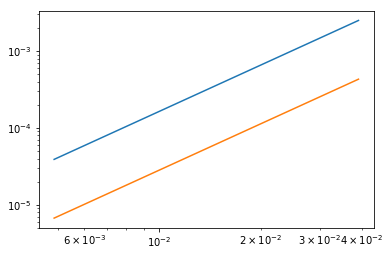

In [181]:
plt.plot(params['h'], params['dt'])
plt.plot(params['h'], params['eta_T'])
plt.loglog()

# Local truncation error

$$
  e_i = -2\frac{T_s - T_i}{1+2\sqrt{\eta}}\frac{\sqrt{\eta}}{h^2}\exp(-\frac{y_i-1/2}{\sqrt{\eta}})
        (\cosh{(\frac{h}{\sqrt{\eta}})} - 1 - \frac{h^2}{2\eta}) 
$$

In [987]:
L=1
MYPATH_THEORY='../Heat_transfer_Polymerization/Verif/theory'
! mkdir '../Heat_transfer_Polymerization/Verif/theory'

In [1148]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse.linalg import spsolve   # to solve sparse systems
from numpy import sqrt, exp, cosh

# `values` should be sorted
def get_closest(array, values):
    # make sure array is a numpy array
    array = np.array(array)
    # get insert positions
    idxs = np.searchsorted(array, values, side="left")
    return idxs

def analytical_solution(yarray):
    Tb = T0
    Tt = Ts
    res = []
    for y in yarray:
        if y < 1/2:
            res.append((Tt - Tb)*y + (Tb + Tt)/2)
        else:
            res.append(Tt)
    return res

def bp_solution(yarray, eta):
    Tb = T0
    Tt = Ts
    a = np.sqrt(eta)
    try:
        y = yarray
        if y < 1/2:
            return (Tt - Tb)*y/(1 + a) + ((1 + 2*a)*Tb + Tt)/(2 + 2*a)
        else:
            return Tt - ((Tt - Tb)/(1 + a))*a*exp(-(y - 0.5)/a)
    except:
        res = []
        for y in yarray:
            if y < 1/2:
                res.append((Tt - Tb)*y/(1 + a) + ((1 + 2*a)*Tb + Tt)/(2 + 2*a))
            else:
                res.append(Tt - ((Tt - Tb)/(1 + a))*a*exp(-(y - 0.5)/a))
        return np.asarray(res)

def lte(y, eta, h):
    a = h/sqrt(eta)
    Tb = T0
    Tt = Ts
    y = np.asarray(y)
    return (bp_solution(y-h, eta) - 2*bp_solution(y, eta) + bp_solution(y+h, eta))/h**2 - (np.abs(y) >= 0.5)*(bp_solution(y, eta) - Tt)/eta
#     ei = -2*((Ts - T0)/(1+2*sqrt(eta))) * (sqrt(eta)/h**2) * exp(-(y - 0.5)/sqrt(eta))*(cosh(a) - 1 - 0.5*a**2) 
#     return ei*(y >= 0.5)

def diagA(i, N, h, eta, mode=1):
    if i < N//2:
        return -2
    else:
        return -2 - mode*h**2/eta


def calcE(eta, N, L): #matrix size -> points N+2
    modeA = 1 # 0 simple, 1 exact
    h = L / (N + 1)
    y = np.linspace(h, L - h, N)
    e = [-lte(n*h, eta, h)*h**2 for n in range(1, N+1)]
#     plt.plot(e)
#     plt.show()
    diag = [diagA(i, N, h, eta, modeA) for i in range(N)]
    data = [ np.ones(N), diag,  np.ones(N)]
    A = sp.sparse.spdiags(data, [-1, 0, 1], N, N)
    E = spsolve(A, e)
    return y, np.abs(E)

def calcMaxE(eta, N, L):
    res = calcE(eta, N, L)
    return np.max(res[1])
#     modeA = 1 # 0 simple, 1 exact
#     h = L / (N + 1)
#     y = np.linspace(h, L - h, N)
#     e = -lte(y, eta, h)*h**2
#     diag = [diagA(i, N, h, eta, modeA) for i in range(N)]
#     data = [ np.ones(N), diag,  np.ones(N)]
#     A = sp.sparse.spdiags(data, [-1, 0, 1], N, N)
#     E = spsolve(A, e)
#     return np.max(np.abs(E))

def calcGridMaxE(etas, hs, L):
    x = np.linspace(etas[0],etas[1],etas[2])
    y =  np.linspace(hs[0],hs[1],hs[2])
    X, Y = np.meshgrid(x,y)
    Z = np.zeros((x.size, y.size))
    for i,xx in enumerate(x):
        for j,yy in enumerate(y):
            Z[i][j] = np.max(np.abs(calcE(xx, yy, L)[1]))
    print('Zmin=', Z.min(), ' Zmax=', Z.max())

    fig = go.Figure(data =
        go.Contour(
            x=x, y=y,
            z=Z,
            contours=dict(
                start=Z.min(),
                end=Z.max(),
                size=int((Z.max() - Z.min())/50),
            ),
        ))
    fig.update_layout(
        width = 512,
        height = 512,
        xaxis_title='$\eta$',
        yaxis_title='h',
#         yaxis = yaxis,
#         xaxis = xaxis,
        showlegend=True
    )
    fig.show()

# Modeling error

In [1081]:
etas = [0.1, 0.01, 0.0001]
yy = np.linspace(-0.5, 2, 100)
h = 0.01

list_x = [yy]
list_y = [analytical_solution(yy)]
names = ['Theory']
for eta in etas:
    list_x.append(yy)
    list_y.append(bp_solution(yy, eta))
    names.append('\u03b7=' + str(eta) )

plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large T$', image_name=f'Couette_modeling_error.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['dash', 'solid', 'solid', 'solid', 'solid']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=700, height=500, path=MYPATH_THEORY, yanchor='bottom', y0_anchor=0.01, xanchor='right', x0_anchor=0.99)


Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_modeling_error.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_modeling_error.pdf


In [1149]:
# calcGridMaxE(etas=[1e-10, 1e-2, 40], hs=[1e-5, 1e-2, 20], L=L)
# calcE(1, 0.1, L=1)
k=0
i=np.argwhere(list_x[k] == 0.5)


i, list_x[k][i-1],  list_y[k][i-1], list_x[k][i],  list_y[k][i] , list_x[k][i+1],  list_y[k][i+1] , list_y[k][i+2] 

TypeError: only integer scalar arrays can be converted to a scalar index

In [1150]:
eta=0.01
h = 0.01
# (Ts - T0)*(sqrt(eta) - h - sqrt(eta)*exp(-h/sqrt(eta)) + h**2/sqrt(eta))/(1 + sqrt(eta))/h**2
y=0.6
2*(Ts-T0)*sqrt(eta)/(h**2*(1+sqrt(eta))) *exp(-(y-0.5)/sqrt(eta))*(1 + 0.5*h**2/eta - cosh(h/sqrt(eta))), lte(y, eta, h)

(-0.0009292982059416019, -0.0009292982070308042)

## LTE along y

In [1151]:
eta = 0.01

list_x = []
list_y = []
names = []

for h in [0.1, 0.01, 0.0001]:
    y = np.linspace(h, L - h, int(L/h - 1))
    list_x.append(y)    
    list_y.append( np.abs(lte(y, eta, h)))
    names.append('h=' + str(h))

plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large LTE$', image_name=f'Couette_LTE_y.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[0, 1], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH_THEORY, yanchor='auto', y0_anchor=0.99, xanchor='left', x0_anchor=0.01)

plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large LTE$', image_name=f'Couette_logLTE_y.png', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[-0.4, 0], yrange = [-10, 0.4], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH_THEORY, yanchor='auto', y0_anchor=0.99, xanchor='left', x0_anchor=0.01, \
           xlog=True, ylog=True)
# Interactive lte
# lteInteract(hArray=(0.0001, 0.1, 0.0001), etaArray=(0.000001, 0.01, 0.0001), xlog=True, ylog=True)
lteInteract(hArray=(0.0001, 0.1, 0.0001), etaArray=(0.000001, 0.01, 0.0001), xlog=False, ylog=False)

Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_LTE_y.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_LTE_y.pdf
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_logLTE_y.png
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_logLTE_y.png


interactive(children=(FloatSlider(value=0.01, description='h', max=0.1, min=0.0001, step=0.0001), FloatSlider(…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'f464b5cf-43ac-4aca-bc45-ade0f6c1dab8',
 …

In [1152]:
eta = 0.0001
list_x = []
list_y = []
names = []
for h in [0.001, 0.005, 0.01]:
#     eta=h**2
    N = int(L/h)-2
    print('N=', N, ', h=', h)
    res = calcE(eta, N, L)
    list_x.append(res[0])    
    list_y.append(res[1])
    names.append('h=' + str(h))

plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large E$', image_name=f'Couette_E_y_for_diff_h_eta={eta}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[-0., L], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=700, height=500, path=MYPATH_THEORY, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99)
# plot_graph(list_x, np.abs(np.array(list_y)), names, xtitle=r'$\Large y$', ytitle=r'$\Large E$', image_name=f'Couette_logE_y_for_diff_h_eta={eta}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
#            marker_size=2, linesize=2, xrange =[], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH, yanchor='bottom', y0_anchor=0.01, xanchor='left', x0_anchor=0.01, xlog=True, ylog=True)

h = 0.01
list_x = []
list_y = []
names = []
for eta in [0.1, 0.01, 0.001, 0.0001, 0.00001, 1e-10]:
#     eta=h**2
    N = int(L/h)-2
    print('N=', N, ', h=', h)
    res = calcE(eta, N, L)
    list_x.append(res[0])    
    list_y.append(res[1])
    names.append('\u03b7=' + str(eta) )

plot_graph(list_x, list_y, names, xtitle=r'$\Large y$', ytitle=r'$\Large E$', image_name=f'Couette_E_y_for_diff_eta_h={h}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black', 'orange' ]*5, \
           marker_size=2, linesize=2, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=700, height=500, path=MYPATH_THEORY, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99)

# plot_graph(list_x, np.abs(list_y), names, xtitle=r'$\Large y$', ytitle=r'$\Large E$', image_name=f'Couette_logE_y_for_diff_eta_h={h}.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
#            marker_size=2, linesize=2, xrange =[], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH_THEORY, yanchor='bottom', y0_anchor=0.01, xanchor='left', x0_anchor=0.01, xlog=True, ylog=True)

# EInteract(hArray=(0.0001, 0.01, 0.001), etaArray=(0.000001, 0.01, 0.0001), xlog=False, ylog=False, L=1)


N= 998 , h= 0.001
N= 198 , h= 0.005
N= 98 , h= 0.01
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_E_y_for_diff_h_eta=0.0001.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_E_y_for_diff_h_eta=0.0001.pdf
N= 98 , h= 0.01
N= 98 , h= 0.01
N= 98 , h= 0.01
N= 98 , h= 0.01
N= 98 , h= 0.01
N= 98 , h= 0.01
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3
Plot curve number: 4
Plot curve number: 5


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_E_y_for_diff_eta_h=0.01.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_E_y_for_diff_eta_h=0.01.pdf


In [1154]:
eta = 0.001
list_x = []
list_y = []
names = []
hs = [0.1, 0.01, 0.001]
etas = np.linspace(0.0001, 0.1, 100)
for h in hs:
    N = int(L/h)-2
    print('N=', N, ', h=', h)
    xx = []
    yy = []
    for eta in etas:
        xx.append(eta)
        yy.append(calcMaxE(eta, N, L))
    list_x.append(xx)    
    list_y.append(yy)
    names.append('h=' + str(h) + '         ')

# plot_graph(list_x, list_y, names, xtitle=r'$\Large \eta$', ytitle=r'$\Large \max E$', image_name=f'Couette_maxE_vs_eta.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
#            marker_size=2, linesize=2, xrange =[], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH_THEORY, yanchor='auto', y0_anchor=0.01, xanchor='right', x0_anchor=0.99)

xx = np.linspace(etas[0], 0.1, 100)
list_x += [xx]
list_y += [0.0000001/np.sqrt(xx)]
names += ['$\max E\propto \eta^{-1/2}$']

# hh = np.linspace(hs[-1], hs[0], 10)
# xx = []
# yy = []
# for h in hh:
#     eta=10*h**2
#     xx.append(eta)
#     yy.append(calcMaxE(eta, h, L))

# # list_x += [xx]
# # list_y += [xx**2]
# names += ['$\eta=h^2$']

plot_graph(list_x, np.abs(np.array(list_y)), names, xtitle=r'$\Large \eta$', ytitle=r'$\Large \max E$', image_name=f'Couette_logmaxE_vs_eta.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'solid', 'solid', 'dash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH_THEORY, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, xlog=True, ylog=True,
#           list_xx_fill=[xx], list_yy_fill=[yy], fill_mode = ['tozeroy'], fill_color=['aqua']
          )

list_x = []
list_y = []
names = []
# hs = np.linspace(0.0001, 0.01, 20) 
hs = [0.0001, 0.0025, 0.0005, 0.001, 0.0025, 0.005, 0.01]
etas = [0.0001, 0.001, 0.01]
for eta in etas:
    xx = []
    yy = []
    for h in hs:
        N = int(L/h)-2
        print('N=', N, ', h=', h)
        xx.append(h)
        yy.append(calcMaxE(eta, N, L))
    list_x.append(xx)    
    list_y.append(yy)
    names.append('\u03b7=' + str(eta) + '   ')

# plot_graph(list_x, list_y, names, xtitle=r'$\Large h$', ytitle=r'$\Large \max E$', image_name=f'Couette_maxE_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
#            dash=['solid', 'dot', 'dash', 'longdash', 'longdashdot']*5, \
#            colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
#            marker_size=2, linesize=2, xrange =[], yrange = [], \
#            marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
#            width=1000, height=500, path=MYPATH_THEORY, yanchor='auto', y0_anchor=0.01, xanchor='right', x0_anchor=0.99)

xx = np.linspace(0.0, 0.01, 100)
list_x += [xx]
list_y += [xx**2]
names += ['$\max E\propto h^2$']
 
list_y = np.array([np.array(x) for x in list_y])    
plot_graph(list_x, np.abs(np.array(list_y)), names, xtitle=r'$\Large h$', ytitle=r'$\Large \max E$', image_name=f'Couette_logmaxE_vs_h.pdf', list_x_fill=[], list_y_fill=[], mode=['lines']*20, \
           dash=['solid', 'solid', 'solid', 'dash', 'longdashdot']*5, \
           colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ]*5, \
           marker_size=2, linesize=2, xrange =[], yrange = [], \
           marker_style = ['circle', 'circle', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
           width=1000, height=500, path=MYPATH_THEORY, yanchor='top', y0_anchor=0.99, xanchor='left', x0_anchor=0.01, xlog=True, ylog=True)


N= 8 , h= 0.1
N= 98 , h= 0.01
N= 998 , h= 0.001
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_logmaxE_vs_eta.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_logmaxE_vs_eta.pdf
N= 9998 , h= 0.0001
N= 398 , h= 0.0025
N= 1998 , h= 0.0005
N= 998 , h= 0.001
N= 398 , h= 0.0025
N= 198 , h= 0.005
N= 98 , h= 0.01
N= 9998 , h= 0.0001
N= 398 , h= 0.0025
N= 1998 , h= 0.0005
N= 998 , h= 0.001
N= 398 , h= 0.0025
N= 198 , h= 0.005
N= 98 , h= 0.01
N= 9998 , h= 0.0001
N= 398 , h= 0.0025
N= 1998 , h= 0.0005
N= 998 , h= 0.001
N= 398 , h= 0.0025
N= 198 , h= 0.005
N= 98 , h= 0.01
Plot curve number: 0
Plot curve number: 1
Plot curve number: 2
Plot curve number: 3


Write image to file: ../Heat_transfer_Polymerization/Verif/theory/Couette_logmaxE_vs_h.pdf
Successfully generated: ../Heat_transfer_Polymerization/Verif/theory/Couette_logmaxE_vs_h.pdf
